## EDA and Feature Generation

In this notebook, we perform the exploratory data analysis (EDA) of the Quora questions pairs dataset. Then, we perform text preprocessing which includes lemmatization, tokenization, learning bigrams/trigrams and stop word removal using spaCy. Finally, we generate three types of natural language processing (NLP) features for the dataset using gensim.

In [1]:
import os

In [2]:
#import needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#to install plotly on command line type:
# pip install plotly
# pip install plotly --upgrade
import plotly as pl

In [4]:
#set up graphing utilities
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:
#let's have a look at the dataset first
df = pd.read_csv("train.csv").fillna("")
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.shape

(404290, 6)

We see that the provided training dataset has about half a million records and six columns

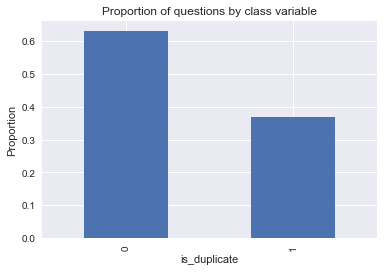

In [8]:
# plot proportion of duplicate and non-duplicate questions
ax = (df.groupby("is_duplicate")['id'].count()/len(df)).plot.bar()
ax.set_ylabel('Proportion')
ax.set_title('Proportion of questions by class variable')

We see that about one-third of the provided question pairs are duplicate, whereas the remaining are labelled non-duplicate

In [9]:
df.question1.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object

### Preprocessing
Next, we use spaCy to preprocess the text that involves
1. Conversion to unicode
2. Lemmatization
3. Learning bi/trigrams
4. Removing stop words

In [10]:
# to install spacy on command line type:
# conda config --add channels conda-forge
# conda install spacy
import spacy

In [11]:
nlp = spacy.load('en')

In [12]:
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [13]:
df.question1.values

array(['What is the step by step guide to invest in share market in india?',
       'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
       'How can I increase the speed of my internet connection while using a VPN?',
       ..., 'What is one coin?',
       'What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?',
       'What is like to have sex with cousin?'], dtype=object)

In [14]:
type(df.question1.values[0])

str

In [15]:
df.question1.values[0]

'What is the step by step guide to invest in share market in india?'

In [16]:
df.question1.values[0].decode('utf-8')

u'What is the step by step guide to invest in share market in india?'

In [17]:
df['unicode_q1'] = df['question1'].str.decode('utf-8')

In [18]:
df['unicode_q2'] = df['question2'].str.decode('utf-8')

In [19]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unicode_q1,unicode_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [20]:
df.shape

(404290, 8)

In [21]:
df_samp = df.iloc[:2500,:]

In [22]:
df_samp['parsed_q1'] = df_samp['unicode_q1'].apply(nlp)

C:\Users\sarma_tvxkwyx\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
df_samp.head()

,id,qid1,qid2,question1,question2,is_duplicate,unicode_q1,unicode_q2,parsed_q1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"(What, is, the, step, by, step, guide, to, inv..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,"(What, is, the, story, of, Kohinoor, (, Koh, -..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"(How, can, I, increase, the, speed, of, my, in..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,"(Why, am, I, mentally, very, lonely, ?, How, c..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,"(Which, one, dissolve, in, water, quikly, suga..."


In [24]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

C:\Users\sarma_tvxkwyx\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [25]:
os.getcwd()

'C:\\Users\\sarma_tvxkwyx'

In [26]:
import codecs
qtext_filepath = r'qtext.txt'

In [27]:
%%time

if 1==1:

    with codecs.open(qtext_filepath, 'w', encoding='utf_8') as f:
            for sentence in df.unicode_q1.values:
                sentence = sentence.replace('\n', ' ')
                f.write(sentence + '\n')
            for sentence in df.unicode_q2.values:
                sentence = sentence.replace('\n', ' ')
                f.write(sentence + '\n')
    

Wall time: 1.56 s


In [28]:
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def get_qline(filename):
    """
    generator function to read in questions from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for sent in f:
            sent = sent.replace('\n', '')
            yield sent
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse questions,
    lemmatize the text, and yield sentences
    """
    
    for parsed_question in nlp.pipe(get_qline(filename),
                                  batch_size=10000, n_threads=-1):
        sent_out = []
        for sent in parsed_question.sents:
            for token in sent:
                if not punct_space(token):
                    sent_out.append(token.lemma_)
        yield u' '.join(sent_out)

In [29]:
unigram_sentences_filepath = r'unigram_sentences_all.txt'

In [30]:
# how many lines can we count directly in the file
with codecs.open(qtext_filepath, encoding='utf_8') as f:
    print sum((1 for _ in f))

808580


In [31]:
# how many lines can we count from the generator
print sum((1 for _ in get_qline(qtext_filepath)))

808580


In [34]:
%%time
# write lemmatized unigram sentences into a file
if 1==1:
    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus(qtext_filepath):
            f.write(sentence + '\n')

Wall time: 2min 15s


In [35]:
# a utility function to count the number of lines in a text file
# needed to verify that the number of lines are preserved 
# during pre-processing
def wc_l(filename):
    """ returns number of lines in file """
    with open(filename) as fin:
        return sum((1 for _ in fin))

In [36]:
wc_l(unigram_sentences_filepath)/2

404290

In [37]:
# we write our own LineSentence implementation because the default
# implementation from spaCy was unnecessarily creating additional 
# sentences
class MyLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        with codecs.open(self.filename, 'r', encoding='utf_8') as f:
            for line in f:
                line.replace('\n', '')
                yield line.split()

In [38]:
unigram_sentences = MyLineSentence(unigram_sentences_filepath)

In [39]:
import itertools as it

In [40]:
# let's have a peek at the preprocessing so far
for unigram_sentence in it.islice(unigram_sentences, 250, 260):
    print u' '.join(unigram_sentence)
    print u''

how can -PRON- recover -PRON- gmail password

how accurately can a mental illness can be diagnose

be knee pain in a 20 year old girl normal

what be the quality of a good leader

what be the difference between bay gulf and strait

will modi win in 2019

how can -PRON- open dmart store in india be there any franchise for that

what be the good youtube channel to learn medicine

do swami vivekananda ever eat non veg or egg during -PRON- journey around the world

what will happen if -PRON- cancel tqwl ticket before the charting be do



In [43]:
bigram_model_filepath = r'bigram_model_all'

In [44]:
%%time
# learn and save the bigram model

if 1==1:
    bigram_model = Phrases(unigram_sentences)
    bigram_model.save(bigram_model_filepath)

# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

Wall time: 17 s


In [45]:
bigram_sentences_filepath = r'bigram_sentences_all.txt'

In [46]:
%%time
# write sentences into a file with bigrams identified

if 1==1:

    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for unigram_sentence in unigram_sentences:
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            bigram_sentence = bigram_sentence.replace('\n', '')
            f.write(bigram_sentence + '\n')

C:\Users\sarma_tvxkwyx\Anaconda2\lib\site-packages\gensim\models\phrases.py:274: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



Wall time: 40.2 s


In [47]:
wc_l(bigram_sentences_filepath)/2

404290

In [48]:
bigram_sentences = MyLineSentence(bigram_sentences_filepath)

In [49]:
# let's have another peek after the bigram processing
for bigram_sentence in it.islice(bigram_sentences, 250, 260):
    print u' '.join(bigram_sentence)
    print u''

how can -PRON- recover -PRON- gmail_password

how accurately can a mental_illness can be diagnose

be knee_pain in a 20_year old girl normal

what be the quality of a good leader

what be the difference_between bay gulf and strait

will modi win in 2019

how can -PRON- open dmart store in india be there_any franchise for that

what be the good youtube_channel to learn medicine

do swami_vivekananda ever eat non_veg or egg during -PRON- journey around the world

what will happen if -PRON- cancel_tqwl ticket before the charting be do



In [50]:
trigram_model_filepath = r'trigram_model.txt'

In [51]:
%%time
# learn and save the trigram model

if 1==1:
    trigram_model = Phrases(bigram_sentences)
    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

Wall time: 17.1 s


In [52]:
trigram_sentences_filepath = r'trigram_sentences_all.txt'

In [53]:
%%time
# write trigram sentences to file

if 1==1:
    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for bigram_sentence in bigram_sentences:
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            f.write(trigram_sentence + '\n')

Wall time: 39.5 s


In [54]:
# check to see if the number of lines is preserved
wc_l(trigram_sentences_filepath)/2

404290

In [55]:
trigram_sentences = MyLineSentence(trigram_sentences_filepath)

In [56]:
# let's peek at the text after trigram identification
for trigram_sentence in it.islice(trigram_sentences, 250, 260):
    print u' '.join(trigram_sentence)
    print u''

how can -PRON- recover -PRON- gmail_password

how accurately can a mental_illness can be diagnose

be knee_pain in a 20_year_old girl normal

what be the quality of a good leader

what be the difference_between bay gulf and strait

will modi win in 2019

how can -PRON- open dmart store in india be there_any franchise for that

what be the good youtube_channel to learn medicine

do swami_vivekananda ever eat_non_veg or egg during -PRON- journey around the world

what will happen if -PRON- cancel_tqwl_ticket before the charting be do



In [57]:
trigram_questions_filepath = r'trigram_transformed_questions_all.txt'

In [58]:
%%time
# remove stopwords

if 1==1:

    with codecs.open(trigram_questions_filepath, 'w', encoding='utf_8') as f:
        for trigram_sentence in trigram_sentences:
            # remove any remaining stopwords
            trigram_question = [term for term in trigram_sentence
                              if term not in spacy.en.STOP_WORDS]

            # write the transformed question as a line in the new file
            trigram_question = u' '.join(trigram_question)
            f.write(trigram_question + '\n')

Wall time: 9.04 s


In [59]:
# how does the final pre-processed text look like?
with codecs.open(trigram_questions_filepath, encoding='utf_8') as f:
    for question in it.islice(f, 250, 260):
        print question

-PRON- recover -PRON- gmail_password

accurately mental_illness diagnose

knee_pain 20_year_old girl normal

quality good leader

difference_between bay gulf strait

modi win 2019

-PRON- open dmart store india there_any franchise

good youtube_channel learn medicine

swami_vivekananda eat_non_veg egg -PRON- journey world

happen -PRON- cancel_tqwl_ticket charting



### Feature Generation
Having pre-processed the text using spaCy, we now proceed with the generation of various kinds of features

In [60]:
# load gensim for feature generation
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import cPickle as pickle

#### Dictionary of terms
Let's first build a dictionary of terms. 

In [61]:
trigram_dictionary_filepath = r'trigram_dict_all.dict'

In [62]:
%%time
if 1==1:
    trigram_questions = LineSentence(trigram_questions_filepath)

    # learn the dictionary by iterating over all of the questions
    trigram_dictionary = Dictionary(trigram_questions)

    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()

    trigram_dictionary.save(trigram_dictionary_filepath)
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)

Wall time: 11.1 s



Create a generator for bag of words (bow) model from the text of questions

In [63]:
trigram_bow_filepath = r'trigram_bow_corpus_all.mm'

In [64]:
def trigram_bow_generator(filepath):
    """
    generator function to read questions from a file
    and yield a bag-of-words representation
    """
    
    for question in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(question)

Now, create and save a Bag of Words Corpus

In [65]:
%%time

if 1==1:
    # generate bag-of-words representations for
    # all questions and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_questions_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

Wall time: 21.5 s


In [66]:
# learn tfidf and load the tfidf corpus
import gensim.models as models
tfidf = models.TfidfModel(trigram_bow_corpus)
corpus_tfidf = tfidf[trigram_bow_corpus]

### LDA Feature Generation
From the vectorized version of the bag of words in each question, we generate the corresponding LDA features

In [69]:
lda_model_filepath = r'lda_model_all.m'

In [70]:
%%time
# first learn the topics from the corpus
if 1==1:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=50,
                           id2word=trigram_dictionary,
                           workers=7)

    lda.save(lda_model_filepath)
    
# load the finished LDA model from disk
lda = LdaMulticore.load(lda_model_filepath)

Wall time: 2min 50s


Let's have a peek at some of the learnt LDA topics. 

In [71]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print u'{:20} {}'.format(u'term', u'frequency') + u'\n'

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print u'{:20} {:.3f}'.format(term, round(frequency, 3))

In [72]:
explore_topic(topic_number=0)

term                 frequency

book                 0.129
good                 0.103
read                 0.057
phone                0.052
game                 0.024
engineering          0.019
degree               0.016
tool                 0.015
charge               0.013
smartphone           0.013
complete             0.012
ex                   0.012
rule                 0.010
's                   0.008
thrones              0.007
series               0.007
prepare              0.006
statement            0.006
improve              0.005
financial            0.005
touch                0.005
write                0.005
want                 0.005
batman               0.005
jee                  0.005


In [73]:
explore_topic(topic_number=2)

term                 frequency

answer               0.074
safe                 0.050
people               0.034
black                0.030
white                0.026
hotel                0.025
on_quora             0.020
question             0.020
brand                0.018
true_that            0.017
wish                 0.014
some_mind_blow       0.013
for_unmarried_couple 0.012
harassment           0.012
google               0.012
moral_police         0.012
police_hotel_staff   0.012
good                 0.011
catch                0.010
note                 0.010
economy              0.009
phrase               0.009
print                0.009
know_about           0.009
nation               0.008


In [74]:
explore_topic(topic_number=3)

term                 frequency

on_quora             0.081
question             0.071
ask                  0.066
donald_trump         0.065
hillary_clinton      0.040
president            0.036
good                 0.028
example              0.024
trump                0.023
vote                 0.018
people               0.014
demonetization       0.011
rank                 0.011
answer               0.011
's                   0.008
professional         0.008
candidate            0.007
package              0.006
interview            0.006
improve              0.006
become_president     0.006
pay                  0.006
bar                  0.005
risk                 0.005
board                0.005


In [75]:
def get_trigram_question(question_number):
    """
    retrieve a particular question index from the
    trigram questions file and return it
    
    """
    with codecs.open(trigram_questions_filepath, encoding='utf_8') as f:
        return list(it.islice(f, question_number, question_number+1))[0].split()

In [76]:
print get_trigram_question(15)

[u'trump_presidency_mean', u'current', u'international_master_\u2019s', u'student', u'f1_visa']


In [77]:
def lda_description(trigram_question, min_topic_freq=0.05):
    """
    (1) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
        
    # create a bag-of-words representation
    question_bow = trigram_dictionary.doc2bow(trigram_question)
    
    # create an LDA representation
    question_lda = lda[question_bow]
    
    # sort with the most highly related topics first
    question_lda = sorted(question_lda, key=lambda (topic_number, freq): -freq)
    
    print question_lda
    
    for topic_number, freq in question_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print '{} {}'.format(topic_number,
                                round(freq, 3))

In [78]:
lda_description(get_trigram_question(15))

[(46, 0.50912777676454601), (10, 0.29887222323545409)]
46 0.509
10 0.299


In [79]:
def save_topics_broad (fout, inp_l1, inp_l2, num_elem):
    """
    saves q1 and q2 features in broad format i.e. side by side
    """
    tdict_1 = dict(inp_l1)
    tdict_2 = dict(inp_l2)
    for i in xrange(num_elem):
        if i in tdict_1.keys():
            fout.write(str(tdict_1[i]) + ',')
        else:
            fout.write(str(0) + ',')
    for i in xrange(num_elem):
        if i in tdict_2.keys():
            fout.write(str(tdict_2[i]) + ',')
        else:
            fout.write(str(0) + ',')
    fout.write('\n')

In [80]:
def lda_transform(question_text):
    """
    accept the original text of a question and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the question text with spaCy
    parsed_question = nlp(question_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_question = [token.lemma_ for token in parsed_question
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_question = bigram_model[unigram_question]
    trigram_question = trigram_model[bigram_question]
    
    # remove any remaining stopwords
    trigram_question = [term for term in trigram_question
                      if not term in spacy.en.STOP_WORDS]
    
    # create a bag-of-words representation
    question_bow = trigram_dictionary.doc2bow(trigram_question)
    
    # create an LDA representation
    question_lda = lda[question_bow]
    
    # sort with the most highly related topics first
    question_lda = sorted(question_lda, key=lambda (topic_number, freq): -freq)
    
    return question_lda

In [81]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unicode_q1,unicode_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [82]:
df.shape

(404290, 8)

In [83]:
from tqdm import tqdm_notebook as tqdm

Save the LDA data into files for model building purposes

In [84]:
lda_data50b_filepath = r'lda_data50b_all.csv'

In [85]:
if 1==1:
    n_pairs = len(df)
    batch_size = 1000
    with codecs.open(lda_data50b_filepath, 'w', encoding='utf_8') as f_out:
        for i in tqdm(xrange(1, n_pairs/batch_size)):
            df_batch = df.iloc[(i-1)*batch_size:i*batch_size,:].copy()
            df_batch['q1_lda'] = df_batch['unicode_q1'].apply(lda_transform)
            df_batch['q2_lda'] = df_batch['unicode_q2'].apply(lda_transform)
            for q1, q2 in zip(df_batch.q1_lda.values, df_batch.q2_lda.values):
                save_topics_broad(f_out, q1, q2, 50)

In [86]:
if 1==1:
    with codecs.open(lda_data50b_filepath, 'a', encoding='utf_8') as f_out:
        df_batch = df.iloc[i*batch_size:,:].copy()
        df_batch['q1_lda'] = df_batch['unicode_q1'].apply(lda_transform)
        df_batch['q2_lda'] = df_batch['unicode_q2'].apply(lda_transform)
        for q1, q2 in zip(df_batch.q1_lda.values, df_batch.q2_lda.values):
            save_topics_broad(f_out, q1, q2, 50)

In [87]:
lda_model300_filepath = r'lda_model_300_all.m'

In [88]:
%%time

if 1==1:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=300,
                           id2word=trigram_dictionary,
                           workers=7)

    lda.save(lda_model300_filepath)
    
# load the finished LDA model from disk
lda = LdaMulticore.load(lda_model300_filepath)

Wall time: 10min 50s


In [89]:
lda_data300b_filepath = r'lda_data300b_all.csv'

In [90]:
if 1==1:
    n_pairs = len(df)
    batch_size = 1000
    with codecs.open(lda_data300b_filepath, 'w', encoding='utf_8') as f_out:
        for i in tqdm(xrange(1, n_pairs/batch_size)):
            df_batch = df.iloc[(i-1)*batch_size:i*batch_size,:].copy()
            df_batch['q1_lda'] = df_batch['unicode_q1'].apply(lda_transform)
            df_batch['q2_lda'] = df_batch['unicode_q2'].apply(lda_transform)
            for q1, q2 in zip(df_batch.q1_lda.values, df_batch.q2_lda.values):
                save_topics_broad(f_out, q1, q2, 300)

In [91]:
if 1==1:
    with codecs.open(lda_data300b_filepath, 'a', encoding='utf_8') as f_out:
        df_batch = df.iloc[i*batch_size:,:].copy()
        df_batch['q1_lda'] = df_batch['unicode_q1'].apply(lda_transform)
        df_batch['q2_lda'] = df_batch['unicode_q2'].apply(lda_transform)
        for q1, q2 in zip(df_batch.q1_lda.values, df_batch.q2_lda.values):
            save_topics_broad(f_out, q1, q2, 300)

### LSI Feature Generation
From the vectorized version of the bag of words in each question, we generate the corresponding LSI features

In [92]:
lsi_model_filepath = r'lsi_model_all.m'

In [93]:
from gensim.models.lsimodel import LsiModel

In [94]:
%%time

if 1==1:
    #import logging
    #logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    #logger = logging.getLogger()
    #logger.propagate = False
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)
        lsi = LsiModel(corpus_tfidf,
                           num_topics=300,
                           id2word=trigram_dictionary,
                           chunksize=2000)

    lsi.save(lsi_model_filepath)
    
# load the finished Lsimodel from disk
lsi = LsiModel.load(lsi_model_filepath)

Wall time: 20min 51s


In [95]:
def lsi_transform(question_text):
    """
    accept the original text of a question and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LSI representation, and
    (5) print a sorted list of the top topics in the LSI representation
    """
    
    # parse the question text with spaCy
    parsed_question = nlp(question_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_question = [token.lemma_ for token in parsed_question
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_question = bigram_model[unigram_question]
    trigram_question = trigram_model[bigram_question]
    
    # remove any remaining stopwords
    trigram_question = [term for term in trigram_question
                      if not term in spacy.en.STOP_WORDS]
    
    # create a bag-of-words representation
    question_bow = trigram_dictionary.doc2bow(trigram_question)
    
    question_tfidf = tfidf[question_bow]
    
    # create an Lsi representation
    question_lsi = lsi[question_bow]
    
    # sort with the most highly related topics first
    question_lsi = sorted(question_lsi, key=lambda (topic_number, freq): -freq)
    
    return question_lsi

In [96]:
lsi_data300b_filepath = r'lsi_data300b_all.csv'

In [97]:
if 1==1:
    n_pairs = len(df)
    batch_size = 1000
    with codecs.open(lsi_data300b_filepath, 'w', encoding='utf_8') as f_out:
        for i in tqdm(xrange(1, n_pairs/batch_size)):
            df_batch = df.iloc[(i-1)*batch_size:i*batch_size,:].copy()
            df_batch['q1_lsi'] = df_batch['unicode_q1'].apply(lsi_transform)
            df_batch['q2_lsi'] = df_batch['unicode_q2'].apply(lsi_transform)
            for q1, q2 in zip(df_batch.q1_lsi.values, df_batch.q2_lsi.values):
                save_topics_broad(f_out, q1, q2, 300)

In [98]:
if 1==1:
    with codecs.open(lsi_data300b_filepath, 'a', encoding='utf_8') as f_out:
        df_batch = df.iloc[i*batch_size:,:].copy()
        df_batch['q1_lsi'] = df_batch['unicode_q1'].apply(lsi_transform)
        df_batch['q2_lsi'] = df_batch['unicode_q2'].apply(lsi_transform)
        for q1, q2 in zip(df_batch.q1_lsi.values, df_batch.q2_lsi.values):
            save_topics_broad(f_out, q1, q2, 300)

#### Doc2Vec Feature Generation

In [99]:
d2v_model_filepath = r'd2v_model.m'

In [100]:
from gensim.models.doc2vec import TaggedLineDocument
from gensim.models import Doc2Vec

In [101]:
trigram_questions_filepath = r'trigram_transformed_questions_all.txt'

In [102]:
%%time

if 1==1:
    train_sentences = TaggedLineDocument(trigram_questions_filepath)
    d2v_model = Doc2Vec(dm=1, dm_mean=1,
                        size=400, window=10, negative=5, hs=0,
                        min_count=2, alpha=0.025, 
                        min_alpha=0.001, iter=50,
                        workers=7)
    d2v_model.build_vocab(train_sentences)
    d2v_model.train(train_sentences, total_examples=d2v_model.corpus_count,
                epochs=d2v_model.iter)
    d2v_model.delete_temporary_training_data(keep_doctags_vectors=True, 
                                         keep_inference=True)
    
    d2v_model.save(d2v_model_filepath)
d2v_model = Doc2Vec.load(d2v_model_filepath)

Wall time: 42min 55s


In [103]:
# let's explore the doc2vec embeddings for a couple of questions
d2v_model.docvecs[1]

array([ -9.82174203e-02,   3.13738696e-02,   4.10821065e-02,
         4.61697765e-02,   5.89968152e-02,   6.00745250e-03,
         8.25706273e-02,  -5.78361265e-02,   2.31606551e-02,
         4.56802100e-02,  -2.73349918e-02,   1.59479249e-02,
         4.87788208e-02,  -2.78492216e-02,   1.07609846e-01,
         4.77705635e-02,   6.16812427e-03,  -9.93105695e-02,
         6.48889244e-02,  -3.75628434e-02,  -1.68333277e-02,
         7.94352517e-02,   2.01203600e-02,   3.73165905e-02,
         7.33051598e-02,  -1.08407915e-01,  -5.04615018e-05,
        -6.01253547e-02,   1.60108805e-02,  -1.44081460e-02,
         1.23247579e-01,  -2.98242979e-02,   1.50347175e-02,
        -2.70194970e-02,  -2.50659883e-02,  -5.62339686e-02,
        -2.43297522e-03,  -5.55542996e-04,   8.06506202e-02,
         1.04231149e-01,  -6.48791119e-02,   1.05931321e-02,
        -2.17529573e-02,  -4.20880653e-02,   3.03923562e-02,
        -5.59917241e-02,  -3.77791151e-02,  -1.00029409e-02,
        -4.96916696e-02,

In [104]:
d2v_model.docvecs[808579]

array([ 0.03838504, -0.08354634, -0.01117271,  0.02555202,  0.02572893,
       -0.00395008,  0.14373481, -0.01543113,  0.0764803 , -0.15870024,
       -0.05951281,  0.08448596,  0.10529042,  0.01061112,  0.06913876,
       -0.02805477,  0.05633304, -0.01129845,  0.15861143,  0.04865975,
       -0.01283512,  0.04331857, -0.01702989, -0.0086982 ,  0.01734035,
       -0.02963531, -0.12042479, -0.02888017, -0.04327978, -0.05721083,
        0.03572964, -0.06752493,  0.07382468,  0.09564143, -0.03470206,
        0.09842788,  0.07821593, -0.00608268, -0.00607084,  0.07767332,
        0.05771419,  0.11027338, -0.00085343, -0.0336242 ,  0.03213579,
       -0.1111417 , -0.04521338, -0.01993181, -0.0444855 ,  0.01215197,
        0.04180873,  0.07373083,  0.06221008, -0.0743958 , -0.05985229,
        0.04578007,  0.10811017,  0.05333172, -0.09555285,  0.00241355,
        0.06538348, -0.01062816, -0.09017845,  0.08363026, -0.15465143,
       -0.08480647, -0.11142755,  0.0165417 , -0.08644711, -0.04

In [105]:
len(d2v_model.docvecs[1])

400

In [106]:
len(d2v_model.docvecs)

808580

In [107]:
d2v_model.corpus_count/2

404290

In [108]:
d2v_model.most_similar('h1b')

[(u'h1b_visa', 0.6292389035224915),
 (u'green_card', 0.5542278289794922),
 (u'visa', 0.5406888723373413),
 (u'f1_visa', 0.5315204858779907),
 (u'i-140', 0.5080620050430298),
 (u'ead', 0.5021740794181824),
 (u'h1-b_visa', 0.49482202529907227),
 (u'h-1b_visa', 0.487729012966156),
 (u'h1-b', 0.4810710549354553),
 (u'b1/b2_visa', 0.47847169637680054)]

In [109]:
def save_vectors_broad (filename, offset, num_rec):
    """
    saves the sentence vectors of all question pairs 
    in a csv file        
    """
    with open(filename, 'w') as fout:
        for i in tqdm(xrange(num_rec)):
            for word in d2v_model.docvecs[i]:
                fout.write(str(word)+',')
            for word in d2v_model.docvecs[i+offset]:
                fout.write(str(word)+',')
            fout.write('\n')

In [110]:
d2v_data400_filepath = r'd2v_data400_all.csv'

In [111]:
offset = d2v_model.corpus_count/2
nrec = d2v_model.corpus_count/2
print offset, nrec

404290 404290


In [112]:
if 1==1:
    save_vectors_broad(d2v_data400_filepath, offset, nrec)